**Importing all the required libraries and loading the data set in pandas data frame**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functools as ft
import math

In [51]:
netflix = pd.read_csv('netflix.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Observations on the shape, data types of all the attributes, conversion of datetime column, missing value detection, statistical summary**

In [7]:
# shape of data
netflix.shape

(8807, 12)

In [8]:
#data types of all the attributes
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
#conversion of datetime column
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
#conversion of duration column to numeric value
netflix['duration'] = netflix['duration'].apply(lambda x:str(x).split()[0]).replace({'nan':np.nan})
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
#percentage missing value detection in each columns
netflix.isnull().apply(lambda x:np.round(x.sum()/len(netflix)*100,2))

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

In [12]:
#statistical summary 1
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
#statistical summary 2
netflix.describe(include='object')

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,17,210,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,TV-MA,1,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,3207,1793,362,4




---



**Pre-Proccessing of the data**

Unnesting the columns and creating a single merged dataframe

In [14]:
def unnest(keycol,nestedcol,dataframe=netflix):
  constraint = netflix[nestedcol].apply(lambda x: str(x).split(', ')).tolist()
  df = pd.DataFrame(constraint,index=dataframe[keycol]).stack().reset_index()
  df.drop(columns="level_1",inplace=True)
  df.rename({0:nestedcol},axis=1,inplace=True)
  df.replace({'nan':np.nan},inplace=True)
  return df

In [15]:
director_df = unnest('title','director')
cast_df = unnest('title','cast')
country_df = unnest('title','country')
listed_in_df = unnest('title','listed_in')

In [16]:
#creating a list of unnested cols' DataFrames
unnested_df_ls=[netflix,director_df,cast_df,country_df,listed_in_df]

#merging all the dataFrames
netflix_un = ft.reduce(lambda left,right:pd.merge(left,right,on='title',how='inner'),unnested_df_ls)

#formatting the columns of the resultant DataFrame
netflix_un.drop(columns=['director_x','cast_x','country_x','listed_in_x'],inplace=True)
netflix_un.rename({'director_y':'director','cast_y':'cast', 'country_y':'country', 'listed_in_y':'listed_in'}, axis=1, inplace=True)


Dealing with missing values of each columns

In [17]:
netflix_un.isnull().sum()

show_id             0
type                0
title               0
date_added        158
release_year        0
rating             67
duration            3
description         0
director        50643
cast             2146
country         11897
listed_in           0
dtype: int64

In [18]:
#replacing missing date_added values with release year
netflix_un['release_year'] = netflix_un['release_year'].astype(str)
netflix_un['date_added'].fillna(pd.to_datetime(netflix_un['release_year']),inplace=True)

In [19]:
#handling missing values in rating
netflix_un['rating'].fillna("other", inplace=True)

In [20]:
missing_country_rows = netflix_un[netflix_un['country'].isna()]

#handling missing values in director
def mode_count(df):
  df['director_mode'] = df.mode()['director'][0]
  return df

netflix_un = netflix_un.groupby(['country','listed_in'], group_keys=False).apply(mode_count)
netflix_un = pd.concat([netflix_un,missing_country_rows], axis=0)
netflix_un['director'].fillna(netflix_un['director_mode'],inplace=True)
netflix_un['director'].fillna('Unknown',inplace=True)
netflix_un.drop("director_mode",axis=1,inplace=True)

In [21]:
#handling missing values in cast
def mode_count(df):
  df['cast_mode'] = df.mode()['cast'][0]
  return df

netflix_un = netflix_un.groupby(['country','listed_in'], group_keys=False).apply(mode_count)
netflix_un = pd.concat([netflix_un,missing_country_rows], axis=0)
netflix_un['cast'].fillna(netflix_un['cast'],inplace=True)
netflix_un['cast'].fillna('Unknown',inplace=True)
netflix_un.drop("cast_mode",axis=1,inplace=True)

In [22]:
# replacing missing duration with median duration of that type
def median_duration(df):
  df['duration_median'] = df['duration'].median()
  return df

netflix_un = netflix_un.groupby('type', group_keys=False).apply(median_duration)
netflix_un['duration'].fillna(netflix_un['duration_median'],inplace=True)
netflix_un.drop("duration_median",axis=1,inplace=True)


In [23]:
# replacing missing country with the most common country
netflix_un['country'].fillna(country_df['country'].value_counts().idxmax(), inplace=True)

In [24]:
netflix_un.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201934
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201991 non-null  object        
 1   type          201991 non-null  object        
 2   title         201991 non-null  object        
 3   date_added    201991 non-null  datetime64[ns]
 4   release_year  201991 non-null  object        
 5   rating        201991 non-null  object        
 6   duration      201991 non-null  object        
 7   description   201991 non-null  object        
 8   director      197064 non-null  object        
 9   cast          201991 non-null  object        
 10  country       201991 non-null  object        
 11  listed_in     201991 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 28.1+ MB




---



**unique counts and value counts (in%)**



In [25]:
show_type = netflix_un[['type','title']].drop_duplicates()
print('unique Type', show_type['type'].nunique())
show_count = show_type['type'].value_counts(normalize=True)*100
show_count.apply(np.round, args=(2,))

unique Type 2


Movie      69.62
TV Show    30.38
Name: type, dtype: float64

<Axes: ylabel='type'>

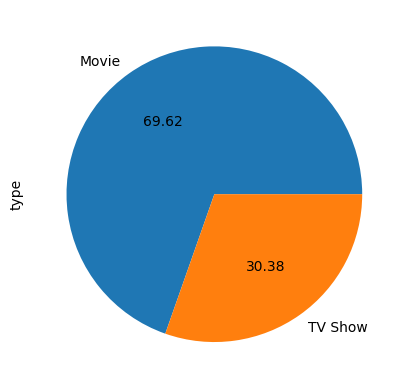

In [26]:
show_count.plot(kind='pie',autopct='%.2f')

In [27]:
show_rating = netflix_un[['rating','title']].drop_duplicates()
print('unique ratings: ', show_rating['rating'].nunique())
print()
show_count = show_rating['rating'].value_counts(normalize=True)*100
show_count.apply(np.round, args=(2,))

unique ratings:  18



TV-MA       36.41
TV-14       24.53
TV-PG        9.80
R            9.07
PG-13        5.56
TV-Y7        3.79
TV-Y         3.49
PG           3.26
TV-G         2.50
NR           0.91
G            0.47
TV-Y7-FV     0.07
other        0.05
NC-17        0.03
UR           0.03
74 min       0.01
84 min       0.01
66 min       0.01
Name: rating, dtype: float64

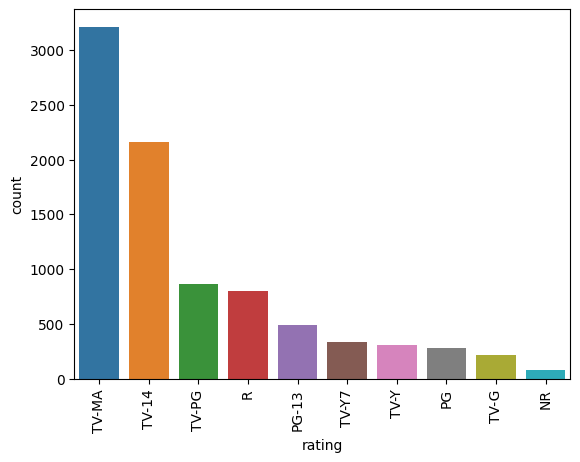

In [28]:
show_rating = show_rating[show_rating['rating'].isin(show_count.index[:10])]
sns.countplot(data=show_rating,x='rating', order=show_count.index[:10])
x = plt.xticks(rotation=90)

In [29]:
show_director = netflix_un[['director','title']].drop_duplicates()
print('unique directors: ', show_director['director'].nunique())
print()
show_count = show_director['director'].value_counts(normalize=True)*100
show_count.apply(np.round, args=(2,))

unique directors:  4994



Unknown             5.22
Danny Cannon        2.90
Noam Murro          2.48
Thomas Astruc       2.39
David Schalko       2.21
                    ... 
William Bindley     0.01
Manav Shah          0.01
Michael Epstein     0.01
Rachel Lears        0.01
Storm Theunissen    0.01
Name: director, Length: 4994, dtype: float64

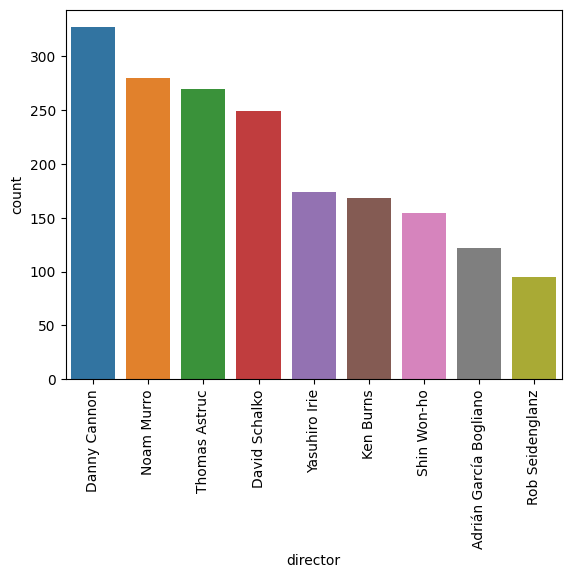

In [30]:
show_director = show_director[show_director['director'].isin(show_count.index[:10])]
sns.countplot(data=show_director, x='director', order=show_count.index[1:10])
x = plt.xticks(rotation=90)

In [31]:
show_cast = netflix_un[['cast','title']].drop_duplicates()
print('unique casts: ', show_cast['cast'].nunique())
print()
show_count = show_cast['cast'].value_counts()*100
show_count.apply(np.round, args=(2,))

unique casts:  36440



Unknown               82500
Anupam Kher            4300
Shah Rukh Khan         3500
Julie Tejwani          3300
Naseeruddin Shah       3200
                      ...  
David Hoole             100
Evans Johnson           100
Brendon Sunderland      100
Islie Hirvonen          100
Ketan Singh             100
Name: cast, Length: 36440, dtype: int64

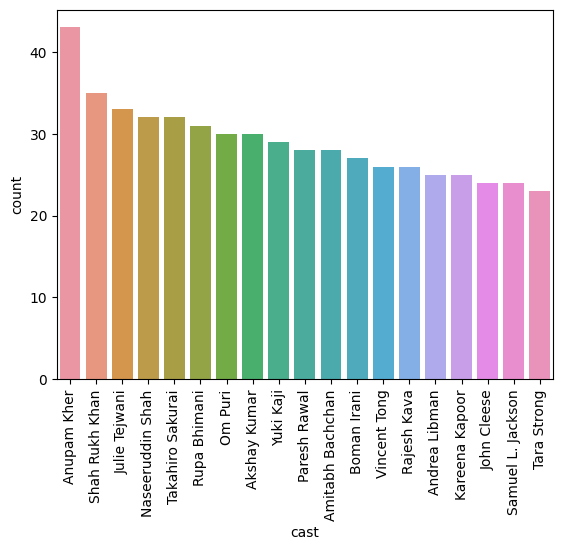

In [32]:
show_cast = show_cast[show_cast['cast'].isin(show_count.index[1:20])]
sns.countplot(data=show_cast, x='cast', order=show_count.index[1:20])
x = plt.xticks(rotation=90)

In [33]:
show_country = netflix_un[['country','title']].drop_duplicates()
print('unique countries: ', show_country['country'].nunique())
print()
show_count = show_country['country'].value_counts(normalize=True)*100
show_count.apply(np.round, args=(2,))

unique countries:  127



United States     41.68
India              9.64
United Kingdom     7.41
Canada             4.10
France             3.62
                  ...  
Bermuda            0.01
Ecuador            0.01
Armenia            0.01
Mongolia           0.01
Montenegro         0.01
Name: country, Length: 127, dtype: float64

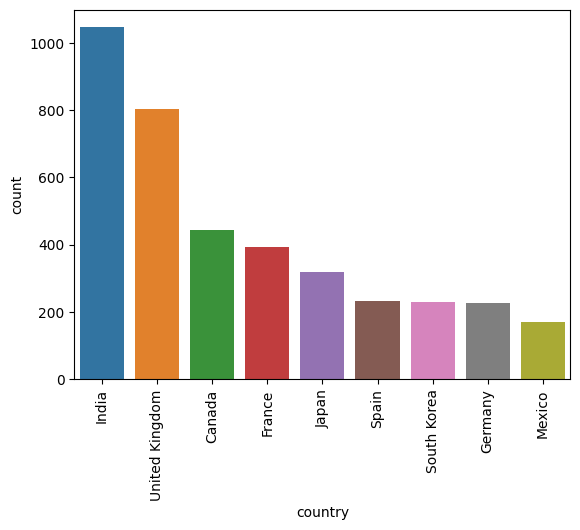

In [34]:
show_country = show_country[show_country['country'].isin(show_count.index[:10])]
sns.countplot(data=show_country, x='country', order=show_count.index[1:10])
x = plt.xticks(rotation=90)

In [35]:
show_listed_in = netflix_un[['listed_in','title']].drop_duplicates()
print('unique categories: ', show_listed_in['listed_in'].nunique())
print()
show_count = show_listed_in['listed_in'].value_counts(normalize=True)*100
show_count.apply(np.round, args=(2,))

unique categories:  42



International Movies            14.24
Dramas                          12.56
Comedies                         8.66
International TV Shows           6.99
Documentaries                    4.50
Action & Adventure               4.45
TV Dramas                        3.95
Independent Movies               3.91
Children & Family Movies         3.32
Romantic Movies                  3.19
TV Comedies                      3.01
Thrillers                        2.99
Crime TV Shows                   2.43
Kids' TV                         2.33
Docuseries                       2.04
Music & Musicals                 1.94
Romantic TV Shows                1.91
Horror Movies                    1.85
Stand-Up Comedy                  1.78
Reality TV                       1.32
British TV Shows                 1.31
Sci-Fi & Fantasy                 1.26
Sports Movies                    1.13
Anime Series                     0.91
Spanish-Language TV Shows        0.90
TV Action & Adventure            0.87
Korean TV Sh

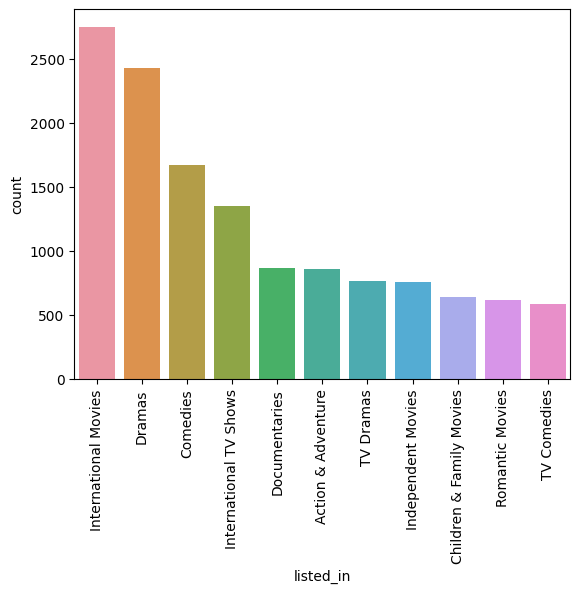

In [36]:
show_listed_in = show_listed_in[show_listed_in['listed_in'].isin(show_count.index[0:11])]
sns.countplot(data=show_listed_in, x='listed_in', order=show_count.index[0:11])
x = plt.xticks(rotation=90)



---



**Comparison of tv shows vs. movies**

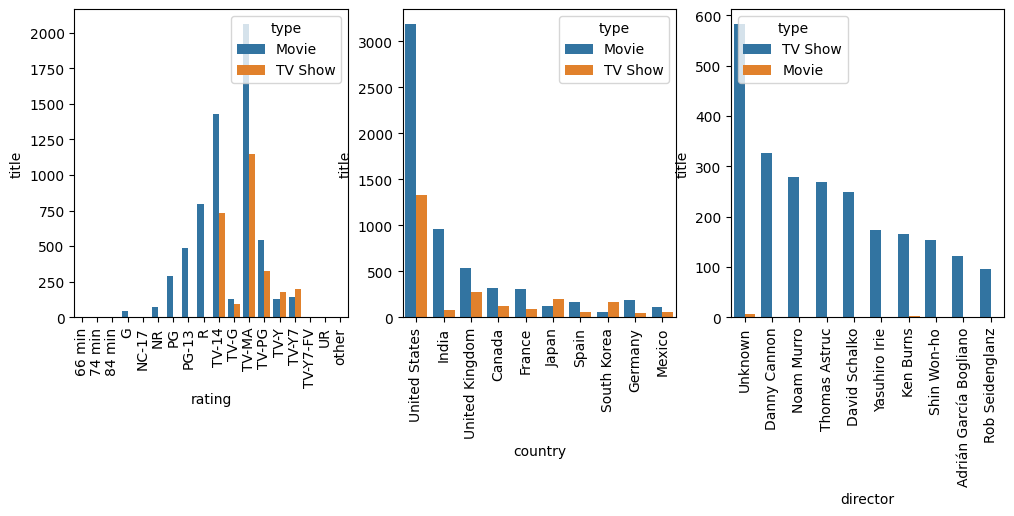

In [37]:
plt.figure(figsize=(12,4))
fig = plt.subplot(1,3,1)

df = netflix_un[['title','type','rating']]
df = df.groupby(['rating','type'],group_keys=False)['title'].nunique().reset_index()
sns.barplot(data=df, x='rating', y='title', hue='type')
x = plt.xticks(rotation=90)


fig = plt.subplot(1,3,2)
df = netflix_un[['title','type','country']]
df1 = df.groupby(['country','type'],group_keys=False)['title'].nunique().reset_index()
top_countries = df.groupby('country')['title'].nunique().sort_values(ascending=False).index[0:10]
sns.barplot(data=df1[df1['country'].isin(top_countries)], x='country', y='title', hue='type', order=top_countries)
x = plt.xticks(rotation=90)


fig = plt.subplot(1,3,3)
df = netflix_un[['title','type','director']]
df1 = df.groupby(['director','type'],group_keys=False)['title'].nunique().reset_index()
top_directors = df.groupby('director')['title'].nunique().sort_values(ascending=False).index[0:10]
sns.barplot(data=df1[df1['director'].isin(top_directors)], x='director', y='title', hue='type', order=top_directors)
x = plt.xticks(rotation=90)



---



**What is the best time to launch a Movies/TV show?**

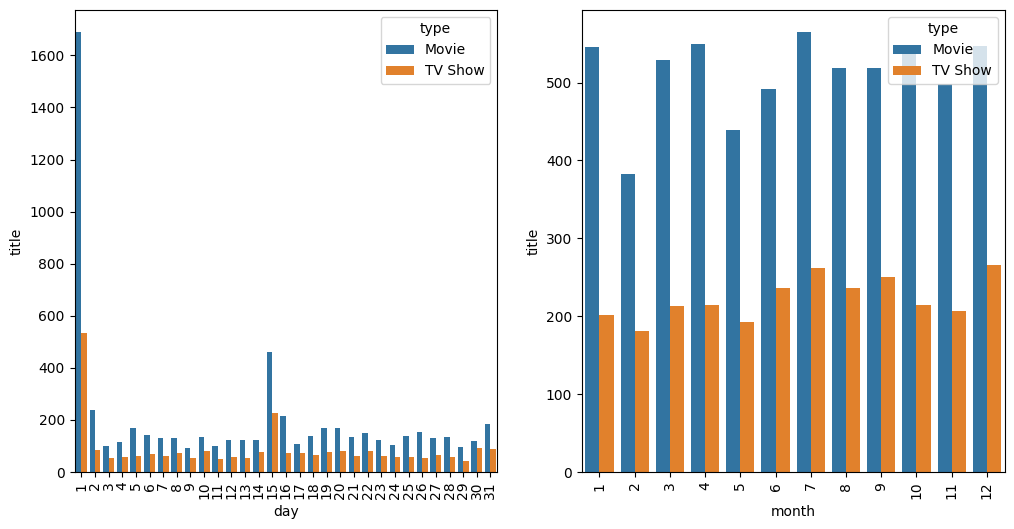

In [50]:
plt.figure(figsize=(12,6))
fig = plt.subplot(1,2,1)

netflix_un['day'] = netflix_un['date_added'].dt.day
df = netflix_un.groupby(['day', 'type'])['title'].nunique().reset_index()
sns.barplot(data=df, x='day', y='title', hue='type')
x = plt.xticks(rotation=90)

fig = plt.subplot(1,2,2)
netflix_un['month'] = netflix_un['date_added'].dt.month
df = netflix_un.groupby(['month', 'type'])['title'].nunique().reset_index()
sns.barplot(data=df, x='month', y='title', hue='type')
x = plt.xticks(rotation=90)



---



**Analysis of actors/directors of different types of shows/movies.**

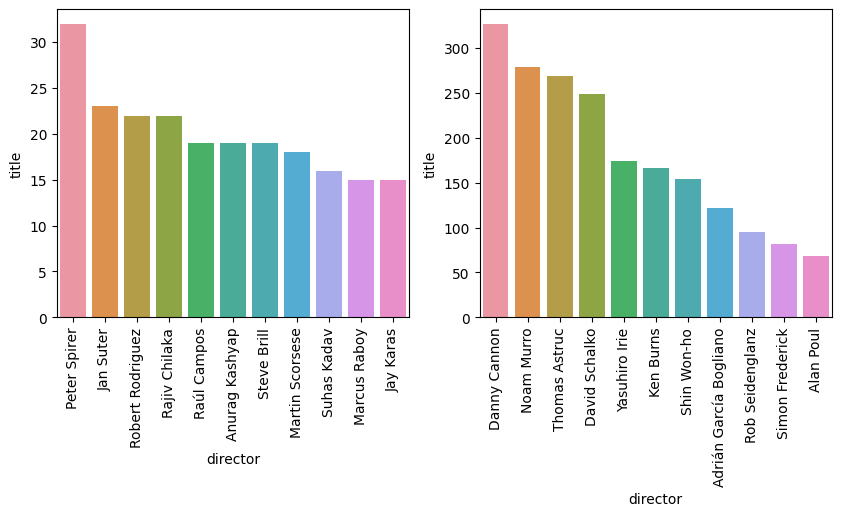

In [40]:
plt.figure(figsize=(10,4))
fig = plt.subplot(1,2,1)

df = netflix_un[netflix_un['type']=='Movie']
df = df[['director','title']].groupby('director')['title'].nunique().sort_values(ascending=False).reset_index()
sns.barplot(data=df.loc[:10], x='director', y='title')
x = plt.xticks(rotation=90)

fig = plt.subplot(1,2,2)
df = netflix_un[netflix_un['type']=='TV Show']
df = df[['director','title']].groupby('director')['title'].nunique().sort_values(ascending=False).reset_index()
sns.barplot(data=df.loc[1:11], x='director', y='title')
x = plt.xticks(rotation=90)

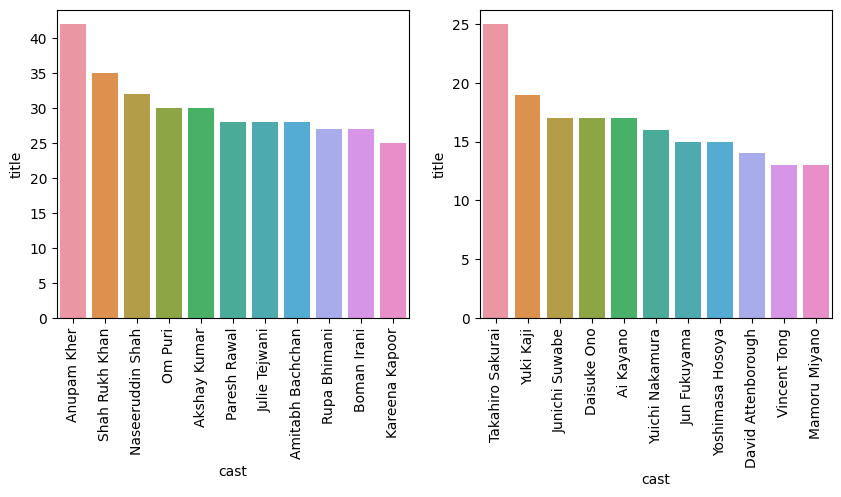

In [41]:
plt.figure(figsize=(10,4))
fig = plt.subplot(1,2,1)

df = netflix_un[netflix_un['type']=='Movie']
df = df[['cast','title']].groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index()
sns.barplot(data=df.loc[1:11], x='cast', y='title')
x = plt.xticks(rotation=90)

fig = plt.subplot(1,2,2)
df = netflix_un[netflix_un['type']=='TV Show']
df = df[['cast','title']].groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index()
sns.barplot(data=df.loc[1:11], x='cast', y='title')
x = plt.xticks(rotation=90)



---



 **Which genre movies are more popular or produced more**

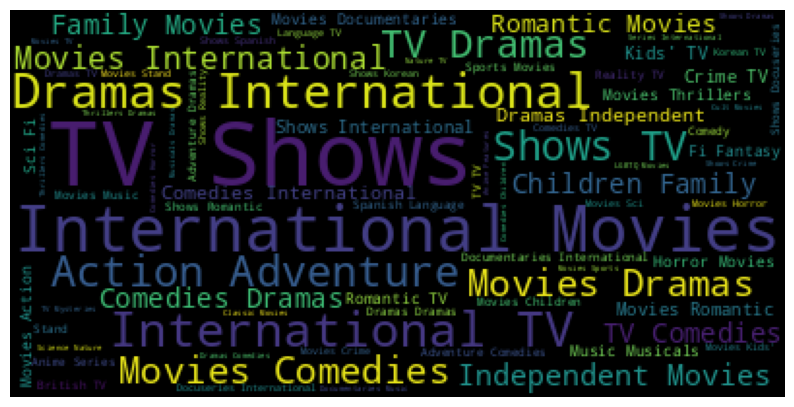

In [42]:
from wordcloud import WordCloud
listed_in_df.dropna(how='all', inplace=True)
text = ' '.join(listed_in_df['listed_in'])
wc = WordCloud().generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wc)
x = plt.axis('off')



---



**Find After how many days the movie will be added to Netflix after the release of  the movie**

0    334
Name: date_diff, dtype: int64


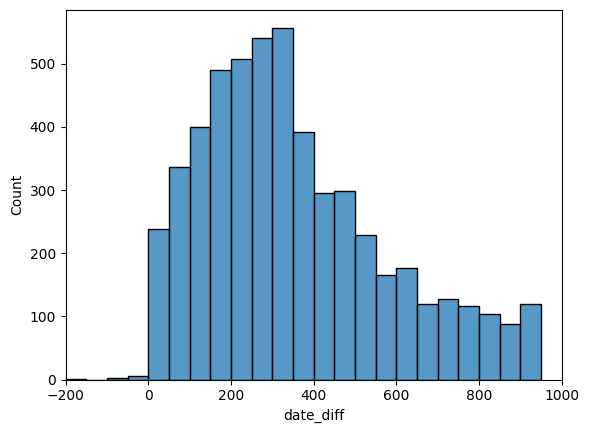

In [43]:
df = netflix.loc[netflix['date_added'].dt.year>2010].copy()
df['release_date'] = pd.to_datetime(df['release_year'].astype(str))
df['date_diff'] = df['date_added']-df['release_date']
plt.xlim(-200,1000)
sns.histplot(df['date_diff'].dt.days, bins=[i for i in range(-200,1000,50)])
print(df['date_diff'].dt.days.mode())



---



**How has the number of movies released per year changed over the past years?**

<Axes: xlabel='release_year', ylabel='Count'>

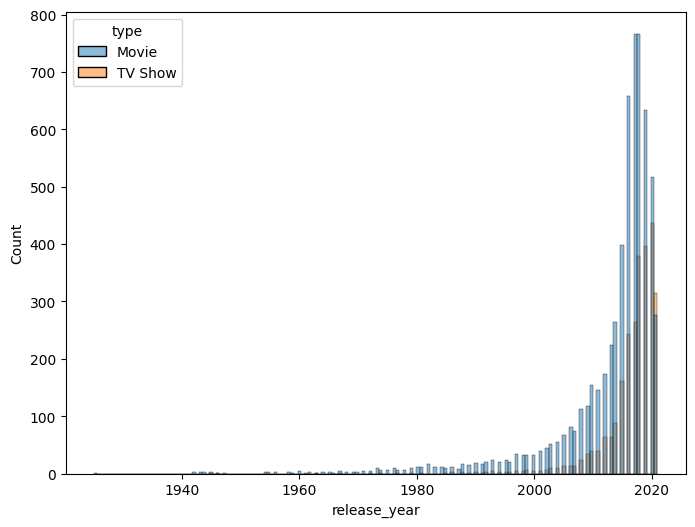

In [44]:
plt.figure(figsize=(8,6))
sns.histplot(x='release_year',hue='type',data=netflix)



---



**Understanding what content is available in different countries**

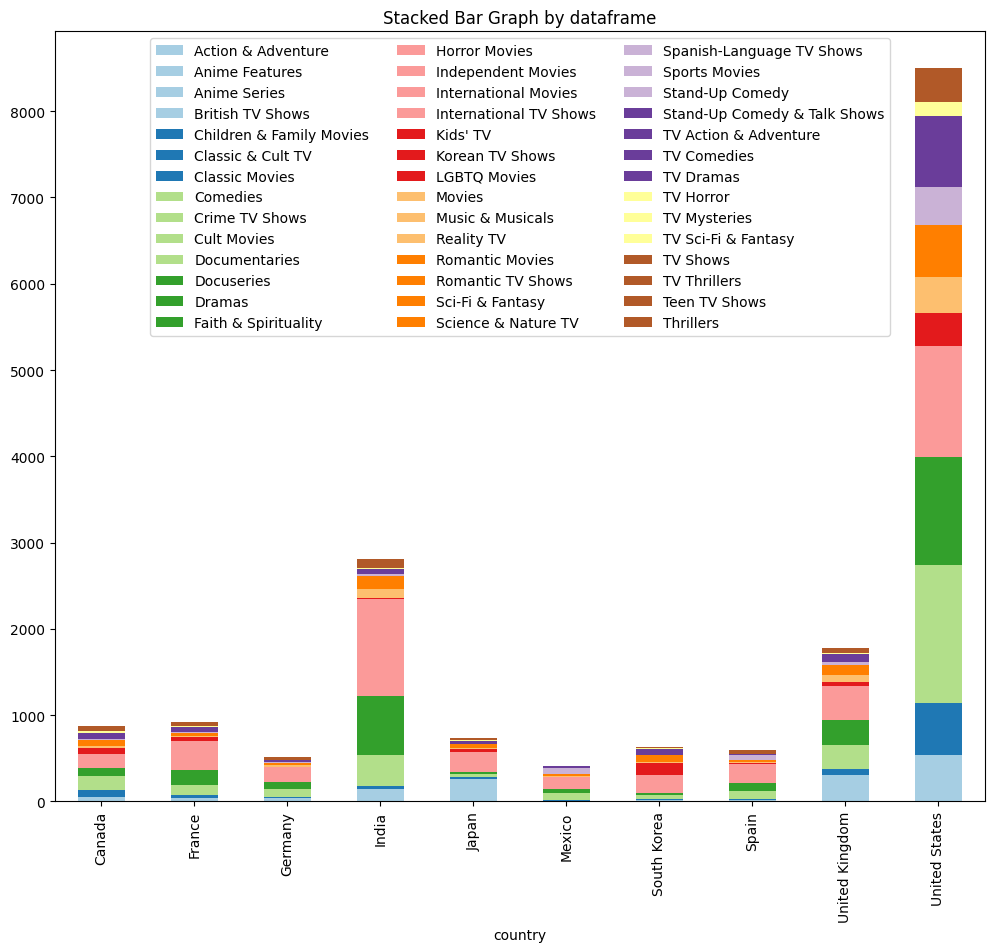

In [45]:
df = netflix_un[['country','listed_in','title']]
df1 = df.groupby(['country','listed_in'])['title'].nunique().reset_index()
top_countries = df.groupby('country')['title'].nunique().sort_values(ascending=False).index[0:10]

df3 = df1[df1['country'].isin(top_countries)].sort_values(['title'],ascending=False).copy()
df3 = df3.pivot(index=['country'], columns='listed_in', values='title')
df3.reset_index(inplace=True)

my_colors = [(x/10.0, x/20.0, 0.1) for x in range(42)]

p = df3.plot(x='country', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe', figsize=(12,10), colormap='Paired')

p.legend(loc='upper center', ncols=3)

plt.show()